# LSTM Model for stock price prediction (AAPL)

Epoch 1/100
34/34 [==============================] - 24s 540ms/step - loss: 0.0488
Epoch 2/100
34/34 [==============================] - 19s 560ms/step - loss: 0.0039
Epoch 3/100
34/34 [==============================] - 19s 539ms/step - loss: 0.0028
Epoch 4/100
34/34 [==============================] - 17s 515ms/step - loss: 0.0023
Epoch 5/100
34/34 [==============================] - 17s 514ms/step - loss: 0.0020
Epoch 6/100
34/34 [==============================] - 21s 625ms/step - loss: 0.0023
Epoch 7/100
34/34 [==============================] - 19s 563ms/step - loss: 0.0018
Epoch 8/100
34/34 [==============================] - 18s 538ms/step - loss: 0.0020
Epoch 9/100
34/34 [==============================] - 22s 663ms/step - loss: 0.0019
Epoch 10/100
34/34 [==============================] - 30s 876ms/step - loss: 0.0026
Epoch 11/100
34/34 [==============================] - 24s 695ms/step - loss: 0.0036
Epoch 12/100
34/34 [==============================] - 22s 646ms/step - loss: 0.0021
E

C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 3s 181ms/step


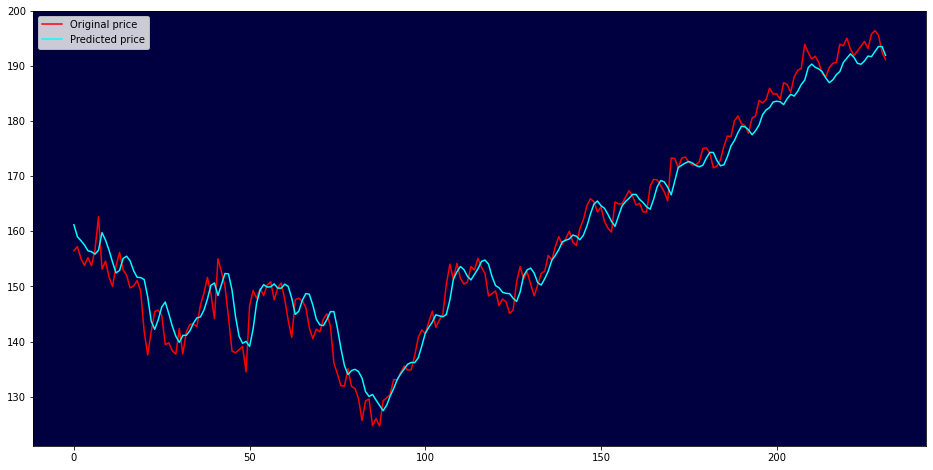

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


model = Sequential()
model.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=250,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=250))
model.add(Dropout(0.2))
model.add(Dense(units=1))


# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save(tk+'_stock_prediction.h5')

model = load_model(tk+'_stock_prediction.h5')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 11.284722585035869
Mean Absolute Error (MAE): 2.6114609816978716


# MSFT 

14/14 [==============================] - 14s 887ms/step


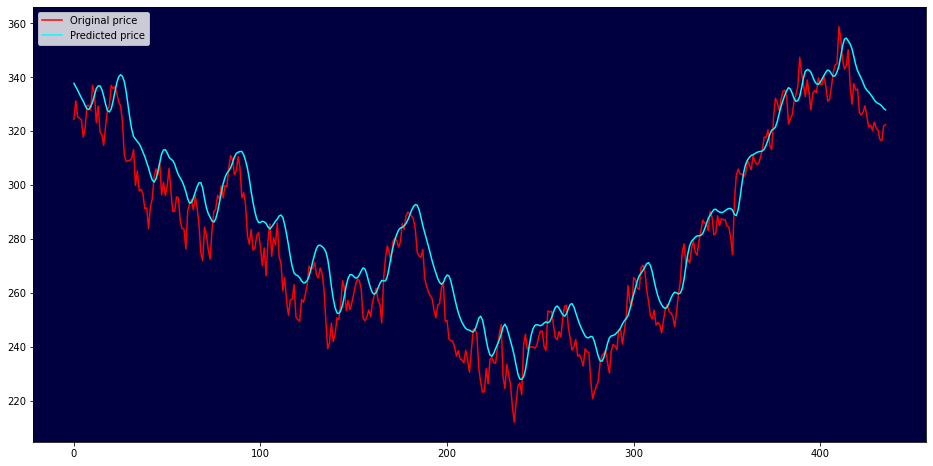

In [41]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100
x_train, y_train = create_dataset(dataset_train, time_step)
x_test, y_test = create_dataset(dataset_test, time_step)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # # Create the Stacked LSTM model
# model = Sequential()
# model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.4))
# model.add(LSTM(units=500, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=350, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=200))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# # x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# # x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# model.compile(loss='mean_squared_error', optimizer='adam')

# model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1)

# # Save the trained model to a file using joblib
# joblib.dump(scaler, tk + '_scaler.joblib')
# model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
model = load_model(tk + '_stock_prediction_new.keras')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()



In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 121.87098841266354
Root Mean Squared Error (RMSE) :  11.039519392286222
Mean Absolute Error (MAE): 8.791381660951387


Enter the number of days to predict: 30
Predicted Prices:
                        Date  Predicted Price
0  2023-08-24 00:00:00-04:00       329.231659
1  2023-08-25 00:00:00-04:00       331.157837
2  2023-08-26 00:00:00-04:00       333.446136
3  2023-08-27 00:00:00-04:00       335.798431
4  2023-08-28 00:00:00-04:00       338.058777
5  2023-08-29 00:00:00-04:00       340.170715
6  2023-08-30 00:00:00-04:00       342.124908
7  2023-08-31 00:00:00-04:00       343.927734
8  2023-09-01 00:00:00-04:00       345.587067
9  2023-09-02 00:00:00-04:00       347.109985
10 2023-09-03 00:00:00-04:00       348.504364
11 2023-09-04 00:00:00-04:00       349.778931
12 2023-09-05 00:00:00-04:00       350.943878
13 2023-09-06 00:00:00-04:00       352.010498
14 2023-09-07 00:00:00-04:00       352.991058
15 2023-09-08 00:00:00-04:00       353.897583
16 2023-09-09 00:00:00-04:00       354.741577
17 2023-09-10 00:00:00-04:00       355.534515
18 2023-09-11 00:00:00-04:00       356.286743
19 2023-09-12 00:00:00

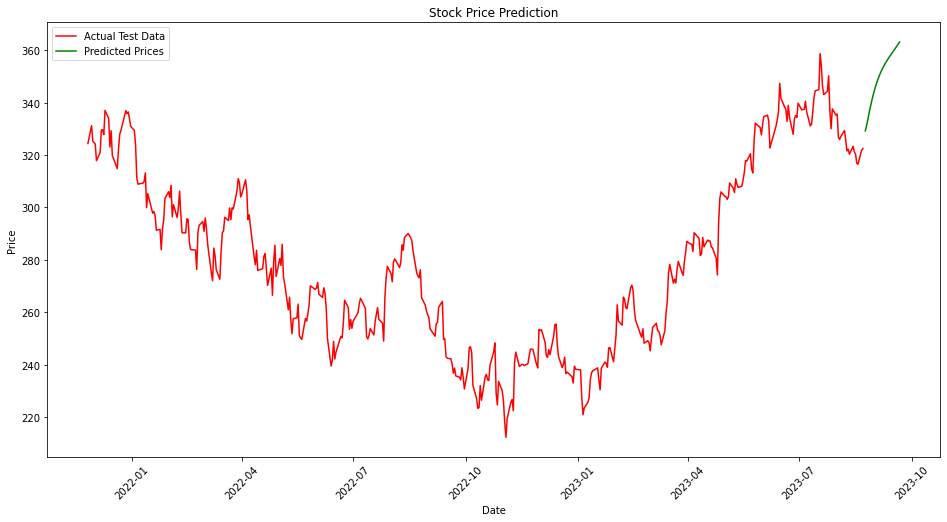

In [43]:
# #Future prediction ##########################################################

# # Predictions for future days
future_days = int(input("Enter the number of days to predict: "))
x_input = dataset_test[len(dataset_test) - time_step:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

n_steps = time_step
lst_output = []

for i in range(future_days):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.append(yhat[0, 0])  # Append the predicted value directly
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.append(yhat)  # Append the predicted value directly

        
lst_output = lst_output[1:]
# Inverse transform predictions back to the original scale
predicted_prices = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

# Get the corresponding dates for the predicted prices
future_dates = pd.date_range(start=df_original.index[-1], periods=future_days + 1, inclusive='right')[1:]

# # Check if the lengths of future_dates and predicted_prices match
if len(future_dates) != len(predicted_prices):
    print("Length mismatch between future_dates and predicted_prices.")
else:
    # Create a dataframe to display the predicted prices and dates
    predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices})

print("Predicted Prices:")
print(predictions_df)

# Plot the original data, test data, and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(df_original.index[-len(y_test_scaled):], y_test_scaled, color='red', label='Actual Test Data')
plt.plot(future_dates, predicted_prices, color='green', label="Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# AAPL (With 150 Epchs)

Epoch 1/150
33/33 [==============================] - 133s 4s/step - loss: 0.0128
Epoch 2/150
33/33 [==============================] - 129s 4s/step - loss: 0.0012
Epoch 3/150
33/33 [==============================] - 125s 4s/step - loss: 0.0012
Epoch 4/150
33/33 [==============================] - 130s 4s/step - loss: 0.0018
Epoch 5/150
33/33 [==============================] - 132s 4s/step - loss: 0.0015
Epoch 6/150
33/33 [==============================] - 134s 4s/step - loss: 0.0017
Epoch 7/150
33/33 [==============================] - 126s 4s/step - loss: 9.5706e-04
Epoch 8/150
33/33 [==============================] - 129s 4s/step - loss: 0.0012
Epoch 9/150
33/33 [==============================] - 135s 4s/step - loss: 9.6787e-04
Epoch 10/150
33/33 [==============================] - 131s 4s/step - loss: 8.6812e-04
Epoch 11/150
33/33 [==============================] - 127s 4s/step - loss: 0.0034
Epoch 12/150
33/33 [==============================] - 132s 4s/step - loss: 0.0014
Epoch 13/150


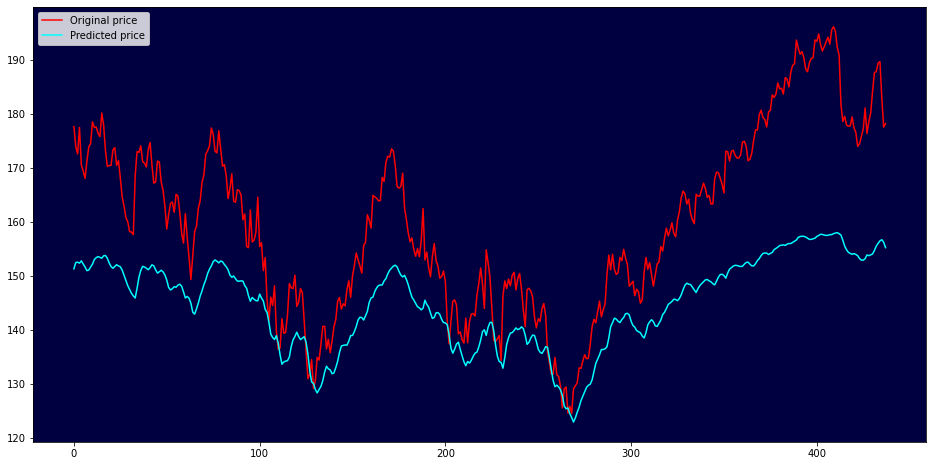

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100
x_train, y_train = create_dataset(dataset_train, time_step)
x_test, y_test = create_dataset(dataset_test, time_step)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # # Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=400, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=150))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=150, batch_size=64, verbose=1)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
model = load_model(tk + '_stock_prediction_new.keras')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 303.8811437742679
Root Mean Squared Error (RMSE) :  17.432187004913295
Mean Absolute Error (MAE): 14.98143310198502


# MSFT (With 150 Epchs)

Epoch 1/150
33/33 [==============================] - 140s 4s/step - loss: 0.0149
Epoch 2/150
33/33 [==============================] - 126s 4s/step - loss: 0.0011
Epoch 3/150
33/33 [==============================] - 127s 4s/step - loss: 0.0013
Epoch 4/150
33/33 [==============================] - 127s 4s/step - loss: 0.0012
Epoch 5/150
33/33 [==============================] - 136s 4s/step - loss: 0.0011
Epoch 6/150
33/33 [==============================] - 130s 4s/step - loss: 9.9892e-04
Epoch 7/150
33/33 [==============================] - 129s 4s/step - loss: 0.0035
Epoch 8/150
33/33 [==============================] - 128s 4s/step - loss: 8.8237e-04
Epoch 9/150
33/33 [==============================] - 128s 4s/step - loss: 9.9525e-04
Epoch 10/150
33/33 [==============================] - 135s 4s/step - loss: 9.1102e-04
Epoch 11/150
33/33 [==============================] - 137s 4s/step - loss: 8.8487e-04
Epoch 12/150
33/33 [==============================] - 130s 4s/step - loss: 0.0012
Epoch

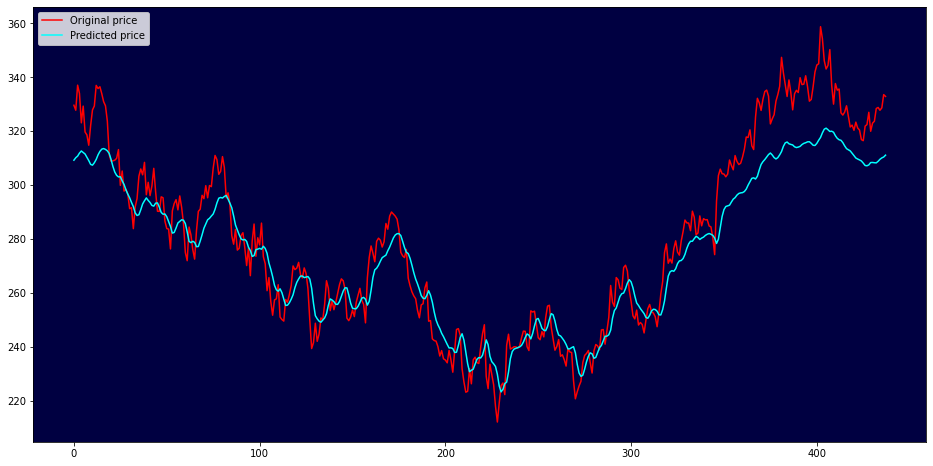

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100
x_train, y_train = create_dataset(dataset_train, time_step)
x_test, y_test = create_dataset(dataset_test, time_step)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # # Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=400, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=150))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=150, batch_size=64, verbose=1)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
model = load_model(tk + '_stock_prediction_new.keras')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 140.77491259597588
Root Mean Squared Error (RMSE) :  11.864860411988667
Mean Absolute Error (MAE): 9.413995368295609


# ORCL (With 150 Epchs)

Epoch 1/150
33/33 [==============================] - 132s 4s/step - loss: 0.0641
Epoch 2/150
33/33 [==============================] - 129s 4s/step - loss: 0.0016
Epoch 3/150
33/33 [==============================] - 129s 4s/step - loss: 0.0015
Epoch 4/150
33/33 [==============================] - 128s 4s/step - loss: 0.0013
Epoch 5/150
33/33 [==============================] - 144s 4s/step - loss: 0.0016
Epoch 6/150
33/33 [==============================] - 251s 8s/step - loss: 0.0014
Epoch 7/150
33/33 [==============================] - 257s 8s/step - loss: 0.0013
Epoch 8/150
33/33 [==============================] - 221s 7s/step - loss: 0.0013
Epoch 9/150
33/33 [==============================] - 128s 4s/step - loss: 0.0022
Epoch 10/150
33/33 [==============================] - 126s 4s/step - loss: 0.0013
Epoch 11/150
33/33 [==============================] - 128s 4s/step - loss: 0.0011
Epoch 12/150
33/33 [==============================] - 144s 4s/step - loss: 0.0011
Epoch 13/150
33/33 [=====

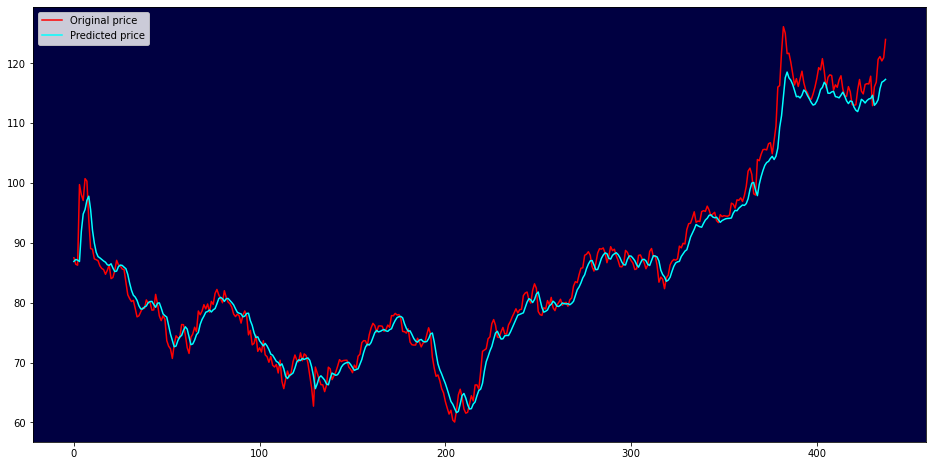

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'ORCL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100
x_train, y_train = create_dataset(dataset_train, time_step)
x_test, y_test = create_dataset(dataset_test, time_step)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# # # Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=400, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=150))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=150, batch_size=64, verbose=1)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_scaler.joblib')
model = load_model(tk + '_stock_prediction_new.keras')


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import math

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 5.682187582285699
Root Mean Squared Error (RMSE) :  2.383733957950362
Mean Absolute Error (MAE): 1.7645889874462668


# MSFT Feature Engineering by adding Volumes

In [39]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import joblib

tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df_original = df.copy()

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

# Fetch additional features (e.g., trading volume) from the original DataFrame
additional_features = df_original[['Volume']].values

# Keep the same number of rows as your closing prices data (dataset_train)
additional_features = additional_features[:len(dataset_train)]

# Normalize additional features
scaler_additional = MinMaxScaler(feature_range=(0, 1))
additional_features_scaled = scaler_additional.fit_transform(additional_features)

# Combine the normalized additional features with the normalized closing prices
combined_features = np.concatenate((dataset_train, additional_features_scaled), axis=1)

def create_dataset(df, time_step=1):
    x = []
    y = []
    for i in range(time_step, df.shape[0]):
        x.append(df[i-time_step:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_step = 100

# Create the training dataset with additional features
x_train, y_train = create_dataset(combined_features, time_step)

# x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test, time_step)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Create the Stacked LSTM model
model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=350, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=200))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=100, batch_size=64, verbose=1)

# Save the trained model to a file using joblib
joblib.dump(scaler, tk + '_FE_scaler.joblib')
model.save(tk + '_FE_stock_prediction_new.keras')

# Load the saved model and scaler
loaded_scaler = joblib.load(tk + '_FE_scaler.joblib')
model = load_model(tk + '_FE_stock_prediction_new.keras')

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)
rmse = math.sqrt(mean_squared_error(y_test_scaled, predictions))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) : ", rmse)
print("Mean Absolute Error (MAE):", mae)

In [ ]:
# #Future prediction ##########################################################

# # Predictions for future days
future_days = int(input("Enter the number of days to predict: "))
x_input = dataset_test[len(dataset_test) - time_step:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

n_steps = time_step
lst_output = []

for i in range(future_days):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
#         print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.append(yhat[0, 0])  # Append the predicted value directly
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.append(yhat)  # Append the predicted value directly

        
lst_output = lst_output[1:]
# Inverse transform predictions back to the original scale
predicted_prices = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)).flatten()

# Get the corresponding dates for the predicted prices
future_dates = pd.date_range(start=df_original.index[-1], periods=future_days + 1, inclusive='right')[1:]

# # Check if the lengths of future_dates and predicted_prices match
if len(future_dates) != len(predicted_prices):
    print("Length mismatch between future_dates and predicted_prices.")
else:
    # Create a dataframe to display the predicted prices and dates
    predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices})

print("Predicted Prices:")
print(predictions_df)

# Plot the original data, test data, and predicted prices
plt.figure(figsize=(16, 8))
plt.plot(df_original.index[-len(y_test_scaled):], y_test_scaled, color='red', label='Actual Test Data')
plt.plot(future_dates, predicted_prices, color='green', label="Predicted Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Feature Engineering by adding trading volumes

Epoch 1/100
34/34 [==============================] - 34s 791ms/step - loss: 0.0808
Epoch 2/100
34/34 [==============================] - 35s 1s/step - loss: 0.0033
Epoch 3/100
34/34 [==============================] - 31s 911ms/step - loss: 0.0028
Epoch 4/100
34/34 [==============================] - 31s 910ms/step - loss: 0.0025
Epoch 5/100
34/34 [==============================] - 31s 903ms/step - loss: 0.0023
Epoch 6/100
34/34 [==============================] - 32s 929ms/step - loss: 0.0029
Epoch 7/100
34/34 [==============================] - 32s 933ms/step - loss: 0.0022
Epoch 8/100
34/34 [==============================] - 30s 893ms/step - loss: 0.0030
Epoch 9/100
34/34 [==============================] - 31s 921ms/step - loss: 0.0023
Epoch 10/100
34/34 [==============================] - 31s 920ms/step - loss: 0.0023
Epoch 11/100
34/34 [==============================] - 31s 912ms/step - loss: 0.0020
Epoch 12/100
34/34 [==============================] - 30s 892ms/step - loss: 0.0021
Epoc

34/34 [==============================] - 29s 844ms/step - loss: 0.0012
Epoch 100/100
1/1 [==============================] - 0s 41ms/step


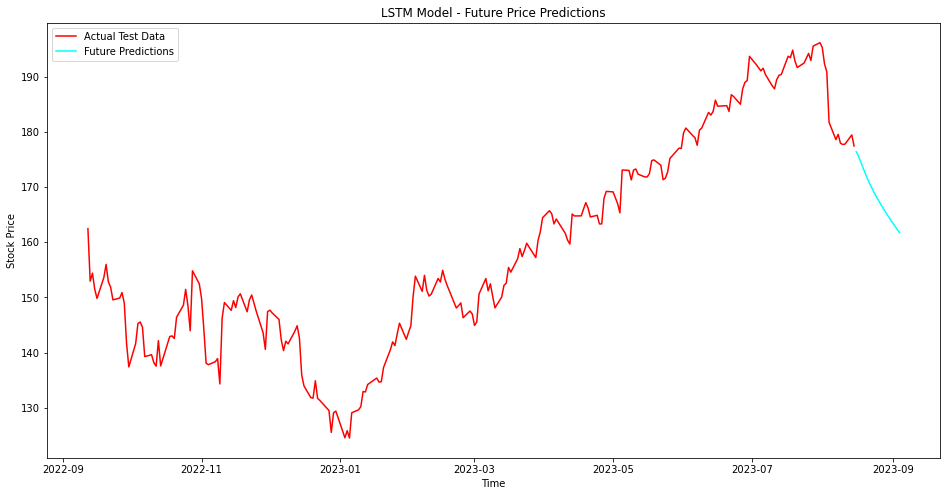

In [20]:
# import pandas as pd
# import numpy as np
# import yfinance as yf
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential, load_model
# from keras.layers import LSTM, Dense, Dropout
# import joblib

# tk = 'AAPL'
# ticker = yf.Ticker(tk)
# df = ticker.history(interval='1d', start='2018-01-01')

# df_original = df.copy()

# df = df['Close'].values
# df = df.reshape(-1, 1)

# dataset_train = np.array(df[:int(df.shape[0]*0.8)])
# dataset_test = np.array(df[int(df.shape[0]*0.8):])

# scaler = MinMaxScaler(feature_range=(0,1))
# dataset_train = scaler.fit_transform(dataset_train)
# dataset_test = scaler.transform(dataset_test)

# # Fetch additional features (e.g., trading volume) from the original DataFrame
# additional_features = df_original[['Volume']].values

# # Keep the same number of rows as your closing prices data (dataset_train)
# additional_features = additional_features[:len(dataset_train)]

# # Normalize additional features
# scaler_additional = MinMaxScaler(feature_range=(0, 1))
# additional_features_scaled = scaler_additional.fit_transform(additional_features)

# # Combine the normalized additional features with the normalized closing prices
# combined_features = np.concatenate((dataset_train, additional_features_scaled), axis=1)

# def create_dataset(df):
#     x = []
#     y = []
#     for i in range(50, df.shape[0]):
#         x.append(df[i-50:i, 0])
#         y.append(df[i, 0])
#     x = np.array(x)
#     y = np.array(y)
#     return x, y

# # Create the training dataset with additional features
# x_train, y_train = create_dataset(combined_features)

# # x_train, y_train = create_dataset(dataset_train)
# x_test, y_test = create_dataset(dataset_test)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# model = Sequential()
# model.add(LSTM(units=250, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=250, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=250, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=250))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))

# model.compile(loss='mean_squared_error', optimizer='adam')

# model.fit(x_train, y_train, epochs=100, batch_size=32)

# # Save the trained model to a file using joblib
# joblib.dump(scaler, tk + '_scaler.joblib')
# model.save(tk + '_stock_prediction_new.keras')

# # Load the saved model and scaler
# loaded_scaler = joblib.load(tk + '_scaler.joblib')
# loaded_model = load_model(tk + '_stock_prediction_new.keras')

# # Get user input for predicting prices for the next n days
# n = 20

# # Initialize an array to store the future predictions
# future_predictions = []

# # Initialize last_data_point with the last 50 data points of the test dataset
# last_data_point = dataset_test[-50:]

# # Make predictions for the next n days
# for _ in range(n):
#     # Reshape last_data_point to match the expected shape of the model
#     input_data = last_data_point.reshape(1, 50, 1)

#     # Make a prediction using the loaded model
#     prediction = loaded_model.predict(input_data)

#     # Append the prediction to the list of future predictions
#     future_predictions.append(prediction[0, 0])

#     # Update last_data_point for the next iteration
#     last_data_point = np.roll(last_data_point, -1)
#     last_data_point[-1] = prediction[0, 0]

# # Generate date range for the next n days
# last_date = df_original.index[-1]  # Use the index of the original DataFrame
# future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=n)

# # Inverse transform predictions
# future_predictions = loaded_scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# # Convert the original scaled dataset_test back to original scale for comparison
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# # Plotting the future predicted prices along with actual test data
# plt.figure(figsize=(16, 8))
# plt.plot(df_original.index[-len(y_test_scaled):], y_test_scaled, color='red', label='Actual Test Data')
# plt.plot(future_dates, future_predictions, color='cyan', label='Future Predictions')
# plt.title('LSTM Model - Future Price Predictions')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

# Final

In [117]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df1 = df.reset_index()['Close']

<AxesSubplot:>

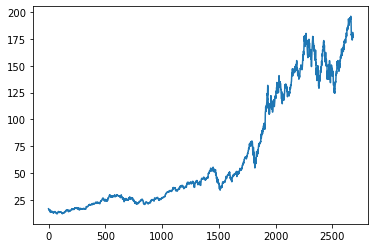

In [118]:
df1.plot()

In [119]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

df1

array([[0.02594243],
       [0.02479162],
       [0.0222841 ],
       ...,
       [0.91820092],
       [0.89246413],
       [0.90457237]])

In [120]:
train_size = int(len(df1)*0.8)
test_size = len(df1)-train_size
train_data, test_data = df1[0:train_size, :], df1[train_size:len(df1), :1]

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_steps = 100
x_train, y_train = create_dataset(train_data, time_steps)
x_test, y_test = create_dataset(test_data, time_steps)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [121]:
model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=400,return_sequences=True))
model.add(Dropout(0.30000000000000004))
model.add(LSTM(units=500,return_sequences=True))
model.add(Dropout(0.30000000000000004))
model.add(LSTM(units=150))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 100, 400)          643200    
                                                                 
 dropout_20 (Dropout)        (None, 100, 400)          0         
                                                                 
 lstm_21 (LSTM)              (None, 100, 400)          1281600   
                                                                 
 dropout_21 (Dropout)        (None, 100, 400)          0         
                                                                 
 lstm_22 (LSTM)              (None, 100, 500)          1802000   
                                                                 
 dropout_22 (Dropout)        (None, 100, 500)          0         
                                                                 
 lstm_23 (LSTM)              (None, 150)              

In [92]:
model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=150, batch_size=64, verbose=1)

Epoch 1/150
32/32 [==============================] - 174s 5s/step - loss: 0.0291 - val_loss: 0.0024
Epoch 2/150
32/32 [==============================] - 152s 5s/step - loss: 9.8033e-04 - val_loss: 0.0090
Epoch 3/150
32/32 [==============================] - 187s 6s/step - loss: 7.0742e-04 - val_loss: 0.0021
Epoch 4/150
32/32 [==============================] - 190s 6s/step - loss: 5.7443e-04 - val_loss: 0.0020
Epoch 5/150
32/32 [==============================] - 194s 6s/step - loss: 6.0490e-04 - val_loss: 0.0021
Epoch 6/150
32/32 [==============================] - 193s 6s/step - loss: 5.0771e-04 - val_loss: 0.0022
Epoch 7/150
32/32 [==============================] - 195s 6s/step - loss: 5.4326e-04 - val_loss: 0.0020
Epoch 8/150
32/32 [==============================] - 176s 6s/step - loss: 4.9783e-04 - val_loss: 0.0021
Epoch 9/150
32/32 [==============================] - 194s 6s/step - loss: 5.4716e-04 - val_loss: 0.0019
Epoch 10/150
32/32 [==============================] - 183s 6s/step -

In [93]:
#predicting and checking performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

14/14 [==============================] - 14s 1s/step


In [94]:
#transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [95]:
#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

55.559817955585245

In [96]:
math.sqrt(mean_squared_error(y_test, test_predict))

154.13157224014765

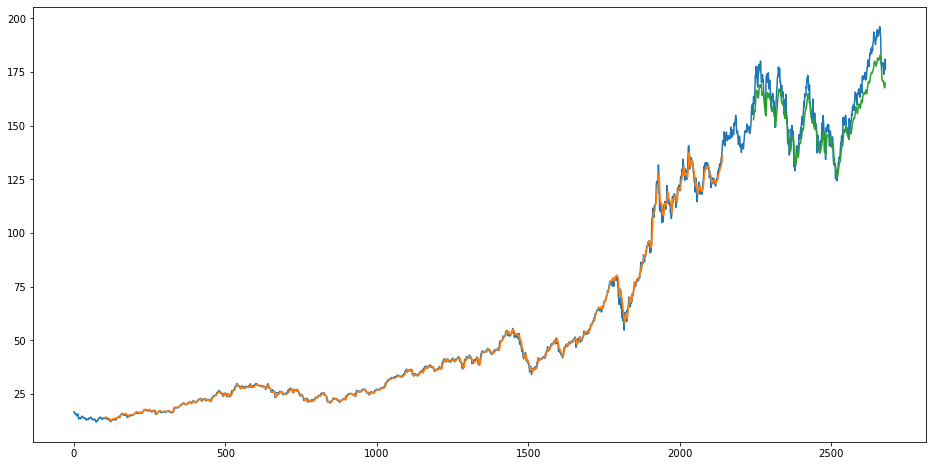

In [97]:
#plotting the results
#shift train predictions for plotting
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_steps*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.figure(figsize=(16, 8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(testPredictPlot)
plt.show()

In [98]:
x_input = test_data[(len(test_data)-time_steps):].reshape(1, -1)
x_input.shape

(1, 100)

In [99]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [108]:
#demonstrating future predictions
from numpy import array

lst_output = []
n_steps = 100
i=0
future_days = 20
while(i<future_days):
    
    if(len(temp_input)>n_steps):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        y_hat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

0 day input [0.871164   0.88396081 0.88455734 0.87935174 0.86503668 0.86655492
 0.87279069 0.88602131 0.89616118 0.8958901  0.91128967 0.91595293
 0.90852427 0.90651804 0.89898085 0.91389243 0.9160072  0.9313525
 0.92874974 0.93222012 0.94339024 0.93747982 0.93796781 0.93227439
 0.94875839 0.94702317 0.93937769 0.95450609 0.96095877 0.96280236
 0.98655248 0.97836474 0.97223734 0.9748401  0.96871278 0.95748847
 0.95461463 0.96377843 0.96795362 0.96876705 0.98666093 0.98525105
 0.99267979 0.98199767 0.97554507 0.97993717 0.98465461 0.98942632
 0.98248566 0.99663816 1.         0.99544519 0.97901537 0.97136981
 0.92159226 0.90456591 0.90971716 0.90098716 0.89979419 0.90011996
 0.90918766 0.89827388 0.89349579 0.87954138 0.88220197 0.88953204
 0.89707934 0.91820092 0.89246413 0.90457237 1.06700206 0.89872324
 0.8997519  0.88220346 0.86042607 0.84081292 0.82507277 0.81285977
 0.80315149 0.7949177  0.78739846 0.7801609  0.77303958 0.76603806
 0.75923717 0.75272739 0.74657321 0.74080312 0.7354

8 day output [[0.6697122]]
9 day input [0.8958901  0.91128967 0.91595293 0.90852427 0.90651804 0.89898085
 0.91389243 0.9160072  0.9313525  0.92874974 0.93222012 0.94339024
 0.93747982 0.93796781 0.93227439 0.94875839 0.94702317 0.93937769
 0.95450609 0.96095877 0.96280236 0.98655248 0.97836474 0.97223734
 0.9748401  0.96871278 0.95748847 0.95461463 0.96377843 0.96795362
 0.96876705 0.98666093 0.98525105 0.99267979 0.98199767 0.97554507
 0.97993717 0.98465461 0.98942632 0.98248566 0.99663816 1.
 0.99544519 0.97901537 0.97136981 0.92159226 0.90456591 0.90971716
 0.90098716 0.89979419 0.90011996 0.90918766 0.89827388 0.89349579
 0.87954138 0.88220197 0.88953204 0.89707934 0.91820092 0.89246413
 0.90457237 1.06700206 0.89872324 0.8997519  0.88220346 0.86042607
 0.84081292 0.82507277 0.81285977 0.80315149 0.7949177  0.78739846
 0.7801609  0.77303958 0.76603806 0.75923717 0.75272739 0.74657321
 0.74080312 0.73541188 0.73037171 0.72564518 0.72119308 0.71697962
 0.71297777 0.70916474 0.705523

16 day output [[0.6549103]]
17 day input [0.9313525  0.92874974 0.93222012 0.94339024 0.93747982 0.93796781
 0.93227439 0.94875839 0.94702317 0.93937769 0.95450609 0.96095877
 0.96280236 0.98655248 0.97836474 0.97223734 0.9748401  0.96871278
 0.95748847 0.95461463 0.96377843 0.96795362 0.96876705 0.98666093
 0.98525105 0.99267979 0.98199767 0.97554507 0.97993717 0.98465461
 0.98942632 0.98248566 0.99663816 1.         0.99544519 0.97901537
 0.97136981 0.92159226 0.90456591 0.90971716 0.90098716 0.89979419
 0.90011996 0.90918766 0.89827388 0.89349579 0.87954138 0.88220197
 0.88953204 0.89707934 0.91820092 0.89246413 0.90457237 1.06700206
 0.89872324 0.8997519  0.88220346 0.86042607 0.84081292 0.82507277
 0.81285977 0.80315149 0.7949177  0.78739846 0.7801609  0.77303958
 0.76603806 0.75923717 0.75272739 0.74657321 0.74080312 0.73541188
 0.73037171 0.72564518 0.72119308 0.71697962 0.71297777 0.70916474
 0.70552373 0.70204222 0.69870949 0.69551682 0.69245541 0.68951797
 0.68669677 0.6839857

In [109]:
day_new = np.arange(1, n_steps + 1)
day_pred = np.arange(n_steps + 1, future_days + n_steps + 1)

In [110]:
len(df1)

2681

In [111]:
df3 = df1.tolist()
df3.extend(lst_output)

In [112]:
plt.plot(day_new, scaler.inverse_transform(df1[(len(df1) - n_steps) :]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

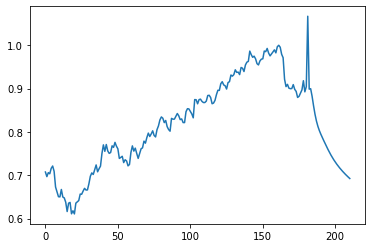

In [105]:
plt.plot(df3[2500:])

# Final run 2 with 100 epochs

14/14 [==============================] - 14s 990ms/step
RMSE : TRAIN :  56.2959155396778
RMSE : TEST :  161.44344160593056


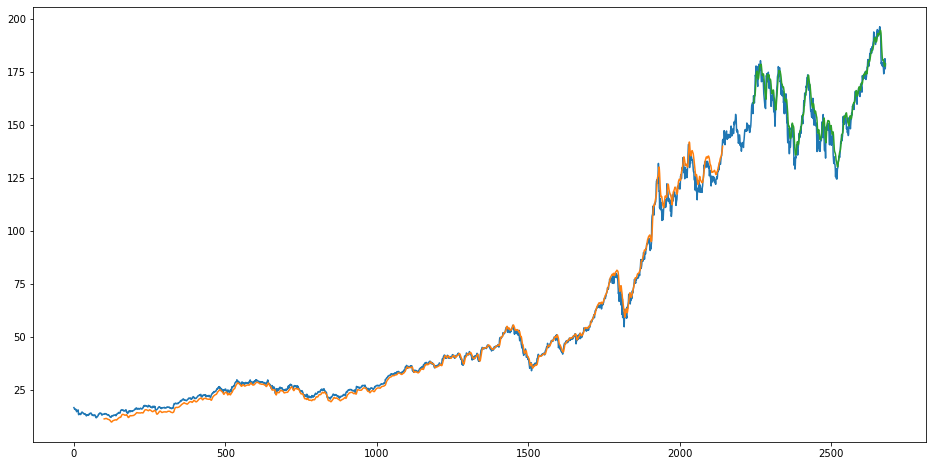

[0.90994877]
101
1 day input [0.82151545 0.8263889  0.81214767 0.80548737 0.80169694 0.83126227
 0.82936714 0.82947535 0.83618991 0.84247125 0.83716449 0.8283383
 0.83001686 0.82156963 0.82151545 0.84669482 0.85357169 0.85308436
 0.84739864 0.84149643 0.83250769 0.8746357  0.87425657 0.86488887
 0.87458151 0.87561036 0.87051329 0.86780216 0.86780216 0.871164
 0.88396081 0.88455734 0.87935174 0.86503668 0.86655492 0.87279069
 0.88602131 0.89616118 0.89589009 0.91128967 0.91595293 0.90852427
 0.90651804 0.89898085 0.91389243 0.9160072  0.9313525  0.92874974
 0.93222012 0.94339024 0.93747982 0.93796781 0.93227439 0.94875839
 0.94702317 0.93937769 0.95450609 0.96095876 0.96280236 0.98655248
 0.97836474 0.97223734 0.9748401  0.96871278 0.95748847 0.95461463
 0.96377843 0.96795362 0.96876704 0.98666093 0.98525105 0.99267979
 0.98199767 0.97554507 0.97993716 0.98465461 0.98942632 0.98248566
 0.99663816 1.         0.99544519 0.97901537 0.97136981 0.92159226
 0.90456591 0.90971716 0.90098716 0.

8 day output [[0.9239456]]
9 day input [0.83618991 0.84247125 0.83716449 0.8283383  0.83001686 0.82156963
 0.82151545 0.84669482 0.85357169 0.85308436 0.84739864 0.84149643
 0.83250769 0.8746357  0.87425657 0.86488887 0.87458151 0.87561036
 0.87051329 0.86780216 0.86780216 0.871164   0.88396081 0.88455734
 0.87935174 0.86503668 0.86655492 0.87279069 0.88602131 0.89616118
 0.89589009 0.91128967 0.91595293 0.90852427 0.90651804 0.89898085
 0.91389243 0.9160072  0.9313525  0.92874974 0.93222012 0.94339024
 0.93747982 0.93796781 0.93227439 0.94875839 0.94702317 0.93937769
 0.95450609 0.96095876 0.96280236 0.98655248 0.97836474 0.97223734
 0.9748401  0.96871278 0.95748847 0.95461463 0.96377843 0.96795362
 0.96876704 0.98666093 0.98525105 0.99267979 0.98199767 0.97554507
 0.97993716 0.98465461 0.98942632 0.98248566 0.99663816 1.
 0.99544519 0.97901537 0.97136981 0.92159226 0.90456591 0.90971716
 0.90098716 0.89979419 0.90011996 0.90918766 0.89827388 0.89349579
 0.87954138 0.88220197 0.889532

16 day output [[0.93385476]]
17 day input [0.85357169 0.85308436 0.84739864 0.84149643 0.83250769 0.8746357
 0.87425657 0.86488887 0.87458151 0.87561036 0.87051329 0.86780216
 0.86780216 0.871164   0.88396081 0.88455734 0.87935174 0.86503668
 0.86655492 0.87279069 0.88602131 0.89616118 0.89589009 0.91128967
 0.91595293 0.90852427 0.90651804 0.89898085 0.91389243 0.9160072
 0.9313525  0.92874974 0.93222012 0.94339024 0.93747982 0.93796781
 0.93227439 0.94875839 0.94702317 0.93937769 0.95450609 0.96095876
 0.96280236 0.98655248 0.97836474 0.97223734 0.9748401  0.96871278
 0.95748847 0.95461463 0.96377843 0.96795362 0.96876704 0.98666093
 0.98525105 0.99267979 0.98199767 0.97554507 0.97993716 0.98465461
 0.98942632 0.98248566 0.99663816 1.         0.99544519 0.97901537
 0.97136981 0.92159226 0.90456591 0.90971716 0.90098716 0.89979419
 0.90011996 0.90918766 0.89827388 0.89349579 0.87954138 0.88220197
 0.88953204 0.89707934 0.91820092 0.89246413 0.90457237 0.90994877
 0.91162294 0.91359389

24 day output [[0.941528]]
25 day input [0.87458151 0.87561036 0.87051329 0.86780216 0.86780216 0.871164
 0.88396081 0.88455734 0.87935174 0.86503668 0.86655492 0.87279069
 0.88602131 0.89616118 0.89589009 0.91128967 0.91595293 0.90852427
 0.90651804 0.89898085 0.91389243 0.9160072  0.9313525  0.92874974
 0.93222012 0.94339024 0.93747982 0.93796781 0.93227439 0.94875839
 0.94702317 0.93937769 0.95450609 0.96095876 0.96280236 0.98655248
 0.97836474 0.97223734 0.9748401  0.96871278 0.95748847 0.95461463
 0.96377843 0.96795362 0.96876704 0.98666093 0.98525105 0.99267979
 0.98199767 0.97554507 0.97993716 0.98465461 0.98942632 0.98248566
 0.99663816 1.         0.99544519 0.97901537 0.97136981 0.92159226
 0.90456591 0.90971716 0.90098716 0.89979419 0.90011996 0.90918766
 0.89827388 0.89349579 0.87954138 0.88220197 0.88953204 0.89707934
 0.91820092 0.89246413 0.90457237 0.90994877 0.91162294 0.91359389
 0.91559929 0.91750062 0.91926879 0.92091823 0.92247123 0.92394561
 0.92535341 0.92670423 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


28 day output [[0.9447747]]
29 day input [0.86780216 0.871164   0.88396081 0.88455734 0.87935174 0.86503668
 0.86655492 0.87279069 0.88602131 0.89616118 0.89589009 0.91128967
 0.91595293 0.90852427 0.90651804 0.89898085 0.91389243 0.9160072
 0.9313525  0.92874974 0.93222012 0.94339024 0.93747982 0.93796781
 0.93227439 0.94875839 0.94702317 0.93937769 0.95450609 0.96095876
 0.96280236 0.98655248 0.97836474 0.97223734 0.9748401  0.96871278
 0.95748847 0.95461463 0.96377843 0.96795362 0.96876704 0.98666093
 0.98525105 0.99267979 0.98199767 0.97554507 0.97993716 0.98465461
 0.98942632 0.98248566 0.99663816 1.         0.99544519 0.97901537
 0.97136981 0.92159226 0.90456591 0.90971716 0.90098716 0.89979419
 0.90011996 0.90918766 0.89827388 0.89349579 0.87954138 0.88220197
 0.88953204 0.89707934 0.91820092 0.89246413 0.90457237 0.90994877
 0.91162294 0.91359389 0.91559929 0.91750062 0.91926879 0.92091823
 0.92247123 0.92394561 0.92535341 0.92670423 0.92800337 0.92925549
 0.93046379 0.93163145

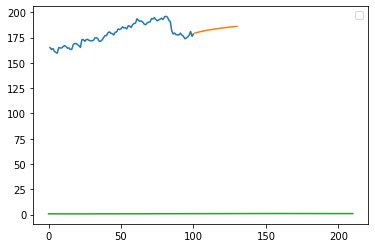

In [14]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df1 = df.reset_index()['Close']

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

train_size = int(len(df1)*0.8)
test_size = len(df1)-train_size
train_data, test_data = df1[0:train_size, :], df1[train_size:len(df1), :1]

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

time_steps = 100
x_train, y_train = create_dataset(train_data, time_steps)
x_test, y_test = create_dataset(test_data, time_steps)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

model = Sequential()
model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.4))
model.add(LSTM(units=400,return_sequences=True))
model.add(Dropout(0.30000000000000004))
model.add(LSTM(units=500,return_sequences=True))
model.add(Dropout(0.30000000000000004))
model.add(LSTM(units=150))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train,validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

#predicting and checking performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

print("RMSE : TRAIN : ",math.sqrt(mean_squared_error(y_train, train_predict)))
print("RMSE : TEST : ",math.sqrt(mean_squared_error(y_test, test_predict)))

#plotting the results
#shift train predictions for plotting
train_predict_plot = np.empty_like(df1)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_steps:len(train_predict)+time_steps, :] = train_predict

#shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(time_steps*2)+1:len(df1)-1, :] = test_predict

#plot baseline and predictions
plt.figure(figsize=(16, 8))
plt.plot(scaler.inverse_transform(df1), label='Actual')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.show()

x_input = test_data[(len(test_data)-time_steps):].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

#demonstrating future predictions
from numpy import array

lst_output = []
n_steps = 100
i=0
future_days = 30
while(i<future_days):
    
    if(len(temp_input)>n_steps):
        x_input = np.array(temp_input[1:])
#         print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
day_new = np.arange(1, n_steps + 1)
day_pred = np.arange(n_steps + 1, future_days + n_steps + 1)

df3 = df1.tolist()
df3.extend(lst_output)

plt.plot(day_new, scaler.inverse_transform(df1[(len(df1) - n_steps) :]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

plt.plot(df3[2500:])

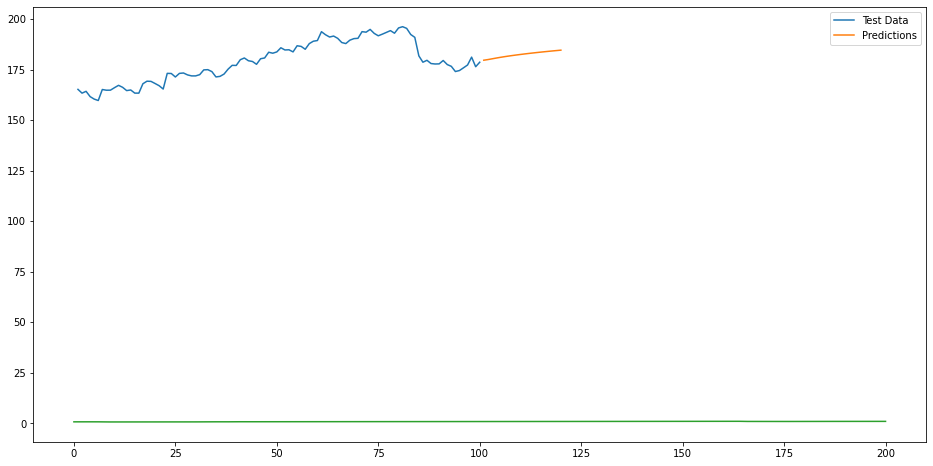

In [13]:
x_input = test_data[(len(test_data)-time_steps):].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

#demonstrating future predictions
from numpy import array

lst_output = []
n_steps = 100
i=0
future_days = 20
while(i<future_days):
    
    if(len(temp_input)>n_steps):
        x_input = np.array(temp_input[1:])
#         print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
#         print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#         print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
day_new = np.arange(1, n_steps + 1)
day_pred = np.arange(n_steps + 1, future_days + n_steps + 1)

df3 = df1.tolist()
df3.extend(lst_output)

plt.figure(figsize=(16, 8))
plt.plot(day_new, scaler.inverse_transform(df1[(len(df1) - n_steps) :]) , label='Test Data')
plt.plot(day_pred, scaler.inverse_transform(lst_output), label='Predictions')
plt.plot(df3[2500:])

# Based on user preference

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from concurrent.futures import ThreadPoolExecutor
from keras.layers import LSTM, Dense, Dropout
import joblib

# Function to create and train LSTM model
def train_lstm_model(df, ticker_symbol):
    df1 = df.reset_index()['Close']
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))
    
    train_size = int(len(df1) * 0.8)
    train_data, test_data = df1[0:train_size, :], df1[train_size:len(df1), :1]
    
    time_steps = 200
    x_train, y_train = create_dataset(train_data, time_steps)
    x_test, y_test = create_dataset(test_data, time_steps)
    
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    model = Sequential()
    model.add(LSTM(units=400, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.4))
    model.add(LSTM(units=400, return_sequences=True))
    model.add(Dropout(0.3))
#     model.add(LSTM(units=500, return_sequences=True))
#     model.add(Dropout(0.3))
    model.add(LSTM(units=150))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=32, verbose=1)
    
    # Save the trained model to a file using joblib
    joblib.dump(model, f'{ticker_symbol}_lstm_model.joblib')
    
    return scaler

# List of stock tickers
tickers = ["AAPL", "MSFT", "ORCL"]  # Add more tickers as needed

# Dictionary to store trained models
trained_models = {}

# Function to train models in parallel
def train_models_parallel(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    df = ticker.history(interval='1d', start='2013-01-01')
    model = train_lstm_model(df, ticker_symbol)
    return ticker_symbol, model

# Use ThreadPoolExecutor for parallel training
with ThreadPoolExecutor() as executor:
    futures = {executor.submit(train_models_parallel, ticker_symbol): ticker_symbol for ticker_symbol in tickers}
    for future in futures:
        ticker_symbol, model = future.result()
        trained_models[ticker_symbol] = model

# Get user input for stock ticker and number of future days
user_ticker = input("Enter a stock ticker (e.g., AAPL, MSFT, ORCL): ")
user_days = int(input("Enter the number of future days for prediction: "))

# Load the saved model for the user's chosen stock
user_model = joblib.load(f'{user_ticker}_lstm_model.joblib')
user_scaler = trained_scalers[user_ticker]

# Make predictions for the user's chosen stock for the next user_days days
x_input = test_data[(len(test_data) - time_steps):].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_steps
i = 0
while i < user_days:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = user_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = user_model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Transform predictions back to original form
future_predictions = user_scaler.inverse_transform(lst_output)

# Generate date range for the next user_days days
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=user_days)

# Plotting the future predicted prices
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Close'], color='red', label='Historical Data')
plt.plot(future_dates, future_predictions, color='blue', label='Future Predictions')
plt.title(f'LSTM Model - Future Price Predictions for {user_ticker}')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend

# Making the model independent of the training data

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import joblib

# Define the stock symbol and load historical data
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-01-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64


def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


# Create the Stacked LSTM model
# model = Sequential()
# model.add(LSTM(units=400, return_sequences=True, input_shape=(time_step, 1)))
# model.add(Dropout(0.4))
# model.add(LSTM(units=400, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(units=500, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(units=150))
# model.add(Dropout(0.2))
# model.add(Dense(units=1))
# model.compile(loss='mean_squared_error', optimizer='adam')
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=300, return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=500, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.4))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Data preparation
df_close = df['Close'].values.reshape(-1, 1)
df_scaled = scaler.fit_transform(df_close)
x_train, y_train = create_dataset(df_scaled, time_step)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Train the model
model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1)

# Save the trained model and scaler
joblib.dump(scaler, tk + '_scaler.joblib')
model.save(tk + '_stock_prediction.keras')


Epoch 1/150
6/6 [==============================] - 20s 2s/step - loss: 0.5367
Epoch 2/150
6/6 [==============================] - 13s 2s/step - loss: 0.1626
Epoch 3/150
6/6 [==============================] - 13s 2s/step - loss: 0.0513
Epoch 4/150
6/6 [==============================] - 13s 2s/step - loss: 0.0416
Epoch 5/150
6/6 [==============================] - 13s 2s/step - loss: 0.0267
Epoch 6/150
6/6 [==============================] - 13s 2s/step - loss: 0.0237
Epoch 7/150
6/6 [==============================] - 13s 2s/step - loss: 0.0202
Epoch 8/150
6/6 [==============================] - 15s 2s/step - loss: 0.0193
Epoch 9/150
6/6 [==============================] - 16s 3s/step - loss: 0.0166
Epoch 10/150
6/6 [==============================] - 17s 3s/step - loss: 0.0142
Epoch 11/150
6/6 [==============================] - 15s 2s/step - loss: 0.0153
Epoch 12/150
6/6 [==============================] - 14s 2s/step - loss: 0.0142
Epoch 13/150
6/6 [==============================] - 14s 2s/st

1/1 [==============================] - 0s 150ms/step
Date: 2023-09-16, Predicted Price: 172.30
Date: 2023-09-17, Predicted Price: 171.28
Date: 2023-09-18, Predicted Price: 170.34
Date: 2023-09-19, Predicted Price: 170.45
Date: 2023-09-20, Predicted Price: 171.39
Date: 2023-09-21, Predicted Price: 173.25
Date: 2023-09-22, Predicted Price: 173.91
Date: 2023-09-23, Predicted Price: 172.46
Date: 2023-09-24, Predicted Price: 167.77
Date: 2023-09-25, Predicted Price: 162.02
Date: 2023-09-26, Predicted Price: 157.51
Date: 2023-09-27, Predicted Price: 154.06
Date: 2023-09-28, Predicted Price: 150.40
Date: 2023-09-29, Predicted Price: 147.15
Date: 2023-09-30, Predicted Price: 145.51
Date: 2023-10-01, Predicted Price: 147.10
Date: 2023-10-02, Predicted Price: 152.18
Date: 2023-10-03, Predicted Price: 157.83
Date: 2023-10-04, Predicted Price: 160.61
Date: 2023-10-05, Predicted Price: 159.91


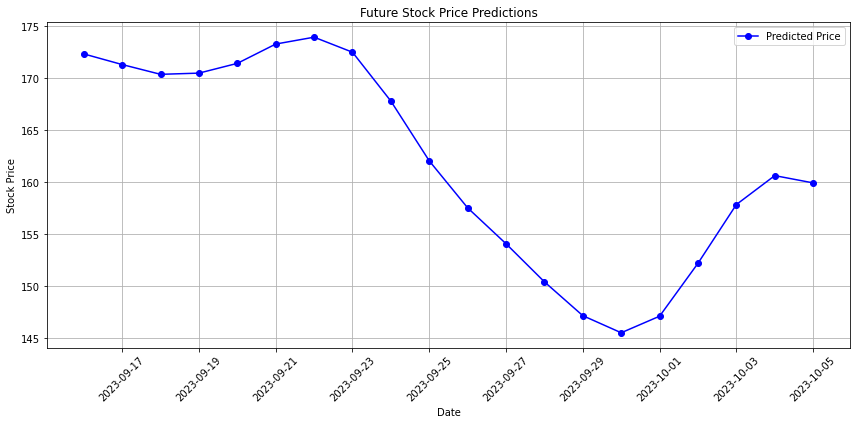

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import joblib

# Define the stock symbol and load historical data
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2022-01-01')
df_original = df.copy()

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

# Load the pre-trained model and scaler
try:
    scaler = joblib.load(tk + '_scaler.joblib')
    model = load_model(tk + '_stock_prediction.keras')
except FileNotFoundError:
    print("Pre-trained model and scaler not found. Please train the model first.")
    exit(1)

def make_future_predictions(model, scaler, df, time_step, num_days):
    # Create a copy of the original dataframe
    df_copy = df.copy()
    
    # Initialize an empty array to store future predictions
    future_predictions = []
    future_dates = []  # To store corresponding dates
    
    # Loop to make predictions for the specified number of days
    for _ in range(num_days):
        # Prepare the data for the current window
        df_window = df_copy.iloc[-time_step:]['Close'].values.reshape(-1, 1)
        df_window_scaled = scaler.transform(df_window)
        x_window = df_window_scaled[-time_step:].reshape(1, -1, 1)
        
        # Make a prediction for the next day
        prediction = model.predict(x_window)
        prediction = scaler.inverse_transform(prediction)
        
        # Append the prediction to the future_predictions array
        future_predictions.append(prediction[0][0])
        
        # Get the date of the next day
        next_day_date = df_copy.index[-1] + pd.DateOffset(1)
        future_dates.append(next_day_date)
        
        # Update the dataframe with the new data point (you can replace this with real future data)
        # For this example, we are generating random data for demonstration purposes.
        new_data_point = np.random.uniform(0.9, 1.1) * df_copy.iloc[-1]['Close']
        new_data = pd.DataFrame({'Close': [new_data_point]}, index=[next_day_date])
        df_copy = pd.concat([df_copy, new_data])
    
    return future_dates, future_predictions

# Specify the number of days into the future for which you want to make predictions
num_days_future = 20  # Change this to the desired number of days

# Make future predictions
future_dates, future_predictions = make_future_predictions(model, scaler, df, time_step, num_days_future)

# Print the future predictions with dates
for date, prediction in zip(future_dates, future_predictions):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Predicted Price: {prediction:.2f}")

# Plot the future predictions
plt.figure(figsize=(12, 6))
plt.plot(future_dates, future_predictions, marker='o', linestyle='-', color='b', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Future Stock Price Predictions')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Training model for multiple stock tickers

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import joblib

# Define a list of stock symbols
ticker_symbols = ['AAPL', 'MSFT', 'ORCL']  # Add more tickers as needed

# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Define the window size and batch size
time_step = 100
batch_size = 64

def create_dataset(dataset, time_step=1):
    x = []
    y = []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        x.append(a)
        y.append(dataset[i + time_step, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

# Create and train models for each stock symbol
for tk in ticker_symbols:
    # Load historical data
    ticker = yf.Ticker(tk)
    df = ticker.history(interval='1d', start='2022-01-01')
    df_original = df.copy()

    # Create the Stacked LSTM model
    model = Sequential()
    model.add(LSTM(units=150, return_sequences=True, input_shape=(time_step, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=300, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(units=500, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=100))
    model.add(Dropout(0.4))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Data preparation
    df_close = df['Close'].values.reshape(-1, 1)
    df_scaled = scaler.fit_transform(df_close)
    x_train, y_train = create_dataset(df_scaled, time_step)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Train the model
    model.fit(x_train, y_train, epochs=150, batch_size=batch_size, verbose=1)

    # Save the trained model and scaler for each ticker
    joblib.dump(scaler, tk + '_scaler.joblib')
    model.save(tk + '_stock_prediction.keras')

    print(f"Model trained and saved for {tk}")

print("All models trained and saved.")